In [1]:
import pandas as pd

In [2]:
f = open('./store.csv','r')
store = pd.read_csv(f)

In [3]:
def tipo(df,ty):
    stack_a=[]
    for dfs in df:
        if dfs == ty:
            stack_a.append(1)
        else:
            stack_a.append(0) 
    return stack_a

In [4]:
store['tipo_store_a']=tipo(store.StoreType,'a')
store['tipo_store_b']=tipo(store.StoreType,'b')
store['tipo_store_c']=tipo(store.StoreType,'c')
store['tipo_store_d']=tipo(store.StoreType,'d')
store['tipo_assortment_a']=tipo(store.Assortment,'a')
store['tipo_assortment_b']=tipo(store.Assortment,'b')
store['tipo_assortment_c']=tipo(store.Assortment,'c')

In [5]:
store.drop('StoreType', axis=1, inplace=True)
store.drop('Assortment', axis=1, inplace=True)

In [6]:
def pasar_int(df):
    stack=[]
    for dfs in df:
        if pd.isnull(dfs):
            stack.append(0)##none = 0
        else:
            stack.append(int(dfs)) 
    return stack

In [7]:
store['CompetitionDistance_int']=pasar_int(store.CompetitionDistance)
store['CompetitionOpenSinceMonth_int']=pasar_int(store.CompetitionOpenSinceMonth)
store['CompetitionOpenSinceYear_int']=pasar_int(store.CompetitionOpenSinceYear)
store['Promo2SinceYear_int']=pasar_int(store.Promo2SinceYear)
store['Promo2SinceWeek_int']=pasar_int(store.Promo2SinceWeek)

In [8]:
store.drop('CompetitionDistance', axis=1, inplace=True)
store.drop('CompetitionOpenSinceMonth', axis=1, inplace=True)
store.drop('CompetitionOpenSinceYear', axis=1, inplace=True)
store.drop('Promo2SinceWeek', axis=1, inplace=True)
store.drop('Promo2SinceYear', axis=1, inplace=True)

In [9]:
store.replace({'PromoInterval': {"Feb,May,Aug,Nov": int(0), "Jan,Apr,Jul,Oct":int(1) ,"Mar,Jun,Sept,Dec":int(2)}},  inplace = True)

In [10]:
store['PromoInterval_int']=pasar_int(store.PromoInterval)
store.drop('PromoInterval', axis=1, inplace=True)

In [11]:
f = open('./train.csv','r')
test = pd.read_csv(f)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
test['Open_int']=pasar_int(test.Open)
test.drop('Open', axis=1, inplace=True)

In [13]:
test.replace({'StateHoliday': {"0": int(0),"a": int(1),"b": int(2),"c": int(3)}},  inplace = True)

In [14]:
def pasar_holiday(df):
    stack_ce=[]
    stack_p=[]
    stack_e=[]
    stack_ch=[]
    for holiday in df: 
        if int(holiday) == 0:
            stack_ce.append(1)
            stack_p.append(0)
            stack_e.append(0)
            stack_ch.append(0)
            continue
        if int(holiday) == 1:
            stack_ce.append(0)
            stack_p.append(1)
            stack_e.append(0)
            stack_ch.append(0)
            continue
        if int(holiday) == 2:
            stack_ce.append(0)
            stack_p.append(0)
            stack_e.append(1)
            stack_ch.append(0)
            continue
        if int(holiday) == 3:
            stack_ce.append(0)
            stack_p.append(0)
            stack_e.append(0)
            stack_ch.append(1)
            continue
        else:
            stack_ce.append(1)
            stack_p.append(0)
            stack_e.append(0)
            stack_ch.append(0)
            continue
    return stack_ce,stack_p,stack_e,stack_ch
        

In [15]:
test['StateHoliday_cerrado_int'],test['StateHoliday_public_int'], test['StateHoliday_Easter_int'],test['StateHoliday_Christmas_int']=pasar_holiday(test.StateHoliday)


In [16]:
#tem=test[['StateHoliday','StateHoliday_cerrado_int','StateHoliday_public_int','StateHoliday_Easter_int','StateHoliday_Christmas_int']]
#tem[tem.StateHoliday_Christmas_int==1]

In [17]:
test.drop('StateHoliday', axis=1, inplace=True)

In [18]:
from datetime import datetime
def año(df):
    stack_año=[]
    for fechas in df: 
        if fechas == 0:
            stack_año.append(0)
        else:
            fecha_año = fechas[:4]
            stack_año.append(int(fecha_año))
    return stack_año

def mes(df):
    stack_mes=[]
    for fechas in df:
        if fechas == 0:
            stack_mes.append(0)
        else:
            fecha_mes = fechas[5:]
            fecha_mes=fecha_mes[:2]
            if(fecha_mes !=""):
                stack_mes.append(int(fecha_mes))
            else:
                stack_mes.append(0)
    return stack_mes
def dia(df):
    stack_dia=[]
    for fechas in df:
        if fechas == 0:
            stack_dia.append(0)
        else:
            fecha_dia = fechas[8:]
            fecha_dia=fecha_dia[:2]
            if(fecha_dia !=""):
                stack_dia.append(int(fecha_dia))
            else:
                stack_dia.append(0)
    return stack_dia

In [19]:
test['año']=año(test.Date)
test['mes']=mes(test.Date)
test['dia']=dia(test.Date)

In [20]:
test.drop('Date', axis=1, inplace=True)

In [21]:
final = store.merge(test, on='Store')

In [22]:
#final.to_csv('final.csv')

In [23]:
def stadistica(df):
    stack=[]
    N=df.count()
    stack.append(int(N))
    minimo=df.min()
    stack.append(int(minimo))
    maximo=df.max()
    stack.append(int(maximo))
    media = df.mean()
    stack.append(float(media))
    mediana = df.median()
    stack.append(float(mediana))
    moda = df.mode()
    stack.append(float(moda))
    #Usamos quantile y el porcentaje.
    p90 = df.quantile(0.9)
    stack.append(int(p90))
    p80 = df.quantile(0.8)
    stack.append(int(p80))
    p75 = df.quantile(0.75)
    stack.append(int(p75))
    p70 = df.quantile(0.7)
    stack.append(int(p70))
    p60 = df.quantile(0.6)
    stack.append(int(p60))
    p50 = df.quantile(0.5)
    stack.append(int(p50))
    p40 = df.quantile(0.4)
    stack.append(int(p40))
    p30 = df.quantile(0.3)
    stack.append(int(p30))
    p25 = df.quantile(0.25)
    stack.append(int(p25))
    p20 = df.quantile(0.2)
    stack.append(int(p20))
    p10 = df.quantile(0.1)
    stack.append(int(p10))
    std = df.std(ddof=0)#desviación típica
    stack.append(float(std))
    var = df.var(ddof=0)#varianza
    stack.append(int(var))
    rango = maximo-minimo #rango es la diferencia entre el máximo y el mínimo 
    stack.append(int(rango))
    iqr = p75-p25 #rango intercuartílico o IQR , diferencia entre el tercer y el primer cuartil
    stack.append(int(iqr))
    cv = std/media #coeficiente de variación
    stack.append(float(cv))
    stack.append(int(df.sum()))
    return stack
def stadistica_str():
    stack=[]
    stack.append('N')
    stack.append('minimo')
    stack.append('maximo')
    stack.append('media')
    stack.append('mediana')
    stack.append('moda')
    stack.append('p90')
    stack.append('p80')
    stack.append('p75')
    stack.append('p70')
    stack.append('p60')
    stack.append('p50')
    stack.append('p40')
    stack.append('p30')
    stack.append('p25')
    stack.append('p20')
    stack.append('p10')
    stack.append('std')
    stack.append('var')
    stack.append('rango')
    stack.append('iqr')
    stack.append('cv')
    stack.append('suma')
    return stack

In [24]:
resultado=pd.DataFrame()
resultado['nombre'] = stadistica_str()

In [25]:
key=['Promo2', 'tipo_store_a', 'tipo_store_b', 'tipo_store_c','tipo_store_d','tipo_assortment_a', 'tipo_assortment_b', 'tipo_assortment_c','CompetitionDistance_int','Sales', 'Customers','SchoolHoliday','StateHoliday_cerrado_int','StateHoliday_public_int','StateHoliday_Easter_int','StateHoliday_Christmas_int']
for keys in key:
    temporal= final[keys]
    resultado[keys]=stadistica(temporal)

In [26]:
pd.options.display.float_format = '{:.2f}'.format
resultado.to_csv("resultados_estadisticos.cvs")

In [27]:
resultado[['nombre','CompetitionDistance_int','tipo_store_a', 'tipo_store_b', 'tipo_store_c','tipo_store_d']]
resultado.head()

,nombre,Promo2,tipo_store_a,tipo_store_b,tipo_store_c,tipo_store_d,tipo_assortment_a,tipo_assortment_b,tipo_assortment_c,CompetitionDistance_int,Sales,Customers,SchoolHoliday,StateHoliday_cerrado_int,StateHoliday_public_int,StateHoliday_Easter_int,StateHoliday_Christmas_int
0,N,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
1,minimo,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,maximo,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,75860.00,41551.00,7388.00,1.00,1.00,1.00,1.00,1.00
3,media,0.50,0.54,0.02,0.13,0.31,0.53,0.01,0.46,5415.98,5773.82,633.15,0.18,0.97,0.02,0.01,0.00
4,mediana,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,2320.00,5744.00,609.00,0.00,1.00,0.00,0.00,0.00


In [28]:
import matplotlib.pyplot as plt

<hr>
<h1> comparación distancia vs tipo store</h1>
<hr>

In [73]:
d = {'tipo store': ['a', 'b','c','d'], 
     'max': [
         final[final.tipo_store_a==1].CompetitionDistance_int.max(),
         final[final.tipo_store_b==1].CompetitionDistance_int.max(),
         final[final.tipo_store_c==1].CompetitionDistance_int.max(),
         final[final.tipo_store_d==1].CompetitionDistance_int.max()
     ],
     'min': [
         final[final.tipo_store_a==1].CompetitionDistance_int.min(),
         final[final.tipo_store_b==1].CompetitionDistance_int.min(),
         final[final.tipo_store_c==1].CompetitionDistance_int.min(),
         final[final.tipo_store_d==1].CompetitionDistance_int.min()
     ],
     'promedio': [
         final[final.tipo_store_a==1].CompetitionDistance_int.mean(),
         final[final.tipo_store_b==1].CompetitionDistance_int.mean(),
         final[final.tipo_store_c==1].CompetitionDistance_int.mean(),
         final[final.tipo_store_d==1].CompetitionDistance_int.mean()
     ]
    }
nuevo=pd.DataFrame(d)
nuevo.set_index('tipo store', inplace=True)

In [74]:
nuevo

,max,min,promedio
tipo store,,,
a,75860,0,5157.63
b,3640,90,1066.06
c,45740,40,3516.70
d,48330,0,5157.63


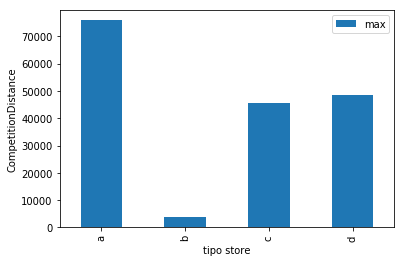

In [75]:
plt.figure()
plt.ylabel('CompetitionDistance') 
plt.xlabel('tipo store')  
nuevo['max'].plot(kind='bar',legend=True)
plt.savefig('Distance_tipo_s_max.png')

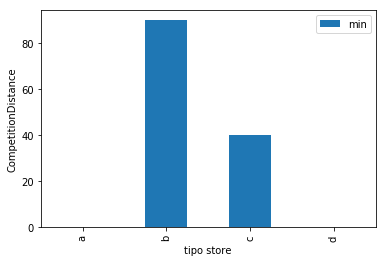

In [76]:
plt.figure()
plt.ylabel('CompetitionDistance')  
nuevo['min'].plot(kind='bar',legend=True)
plt.savefig('Distance_tipo_s_min.png')

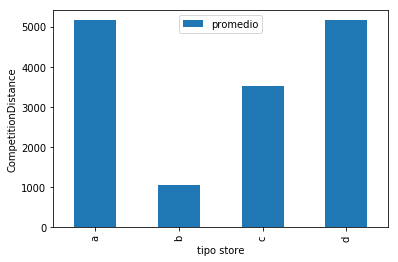

In [77]:
plt.figure()
plt.ylabel('CompetitionDistance')  
nuevo['promedio'].plot(kind='bar',legend=True)
plt.savefig('Distance_tipo_s_promedio.png')

<hr>
<h1> comparación distancia vs tipo assortment</h1>
<hr>

In [78]:
d2 = {'tipo assortment': ['a', 'b','c'], 
     'max': [
         final[final.tipo_assortment_a==1].CompetitionDistance_int.max(),
         final[final.tipo_assortment_b==1].CompetitionDistance_int.max(),
         final[final.tipo_assortment_c==1].CompetitionDistance_int.max()
     ],
     'min': [
         final[final.tipo_assortment_a==1].CompetitionDistance_int.min(),
         final[final.tipo_assortment_b==1].CompetitionDistance_int.min(),
         final[final.tipo_assortment_c==1].CompetitionDistance_int.min()
     ],
     'promedio': [
         final[final.tipo_assortment_a==1].CompetitionDistance_int.mean(),
         final[final.tipo_assortment_b==1].CompetitionDistance_int.mean(),
         final[final.tipo_assortment_c==1].CompetitionDistance_int.mean()
     ]
    }
nuevo2=pd.DataFrame(d2)
nuevo2.set_index('tipo assortment', inplace=True)

In [79]:
nuevo2

,max,min,promedio
tipo assortment,,,
a,48330,0,4384.86
b,3640,210,1190.82
c,75860,0,6665.72


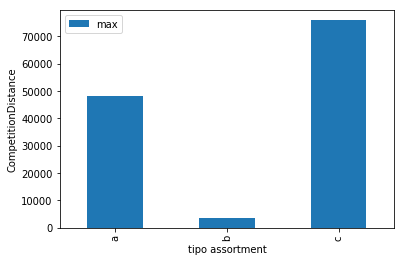

In [80]:
plt.figure()
plt.ylabel('CompetitionDistance') 
plt.xlabel('tipo store')  
nuevo2['max'].plot(kind='bar',legend=True)
plt.savefig('Distance_tipo_a_max.png')

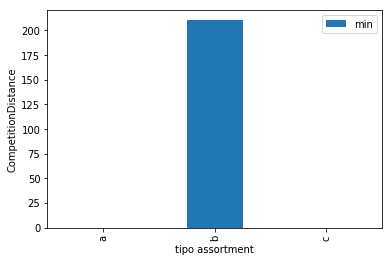

In [81]:
plt.figure()
plt.ylabel('CompetitionDistance')  
nuevo2['min'].plot(kind='bar',legend=True)
plt.savefig('Distance_tipo_a_min.png')

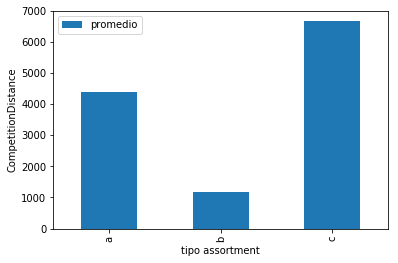

In [82]:
plt.figure()
plt.ylabel('CompetitionDistance')  
nuevo2['promedio'].plot(kind='bar',legend=True)
plt.savefig('Distance_tipo_a_promedio.png')

<hr>
<h1> comparación Sales vs tipo store</h1>
<hr>

In [83]:
d3 = {'tipo store': ['a', 'b','c','d'], 
     'max': [
         final[final.tipo_store_a==1].Sales.max(),
         final[final.tipo_store_b==1].Sales.max(),
         final[final.tipo_store_c==1].Sales.max(),
         final[final.tipo_store_d==1].Sales.max()
     ],
     'min': [
         final[final.tipo_store_a==1].Sales.min(),
         final[final.tipo_store_b==1].Sales.min(),
         final[final.tipo_store_c==1].Sales.min(), 
         final[final.tipo_store_d==1].Sales.min()
     ],
     'promedio': [
         final[final.tipo_store_a==1].Sales.mean(),
         final[final.tipo_store_b==1].Sales.mean(),
         final[final.tipo_store_c==1].Sales.mean(),
         final[final.tipo_store_d==1].Sales.mean()
     ]
    }
nuevo3=pd.DataFrame(d3)
nuevo3.set_index('tipo store', inplace=True)

In [84]:
nuevo3

,max,min,promedio
tipo store,,,
a,41551,0,5738.18
b,38722,0,10058.84
c,31448,0,5723.63
d,38037,0,5738.18


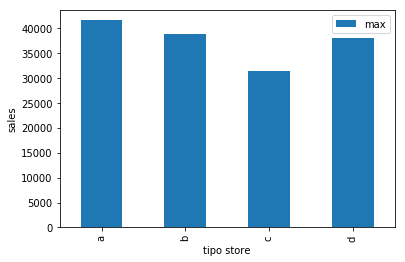

In [85]:
plt.figure()
plt.ylabel('sales') 
plt.xlabel('tipo store')  
nuevo3['max'].plot(kind='bar',legend=True)
plt.savefig('sales_tipo_s_max.png')

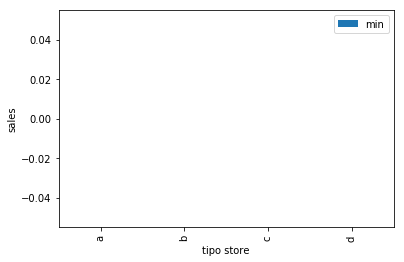

In [86]:
plt.figure()
plt.ylabel('sales')  
nuevo3['min'].plot(kind='bar',legend=True)
plt.savefig('sales_tipo_s_min.png')

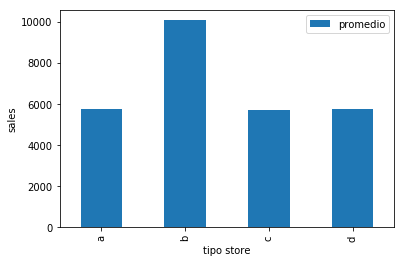

In [87]:
plt.figure()
plt.ylabel('sales')  
nuevo3['promedio'].plot(kind='bar',legend=True)
plt.savefig('sales_tipo_s_promedio.png')

<hr>
<h1> comparación sales vs tipo assortment</h1>
<hr>

In [88]:
d4 = {'tipo assortment': ['a', 'b','c'],
     'max': [
         final[final.tipo_assortment_a==1].Sales.max(),
         final[final.tipo_assortment_b==1].Sales.max(),
         final[final.tipo_assortment_c==1].Sales.max()
     ],
     'min': [
         final[final.tipo_assortment_a==1].Sales.min(),
         final[final.tipo_assortment_b==1].Sales.min(),
         final[final.tipo_assortment_c==1].Sales.min()
            ],
     'promedio': [
         final[final.tipo_assortment_a==1].Sales.mean(),
         final[final.tipo_assortment_b==1].Sales.mean(),
         final[final.tipo_assortment_c==1].Sales.mean()
     ]
    }
nuevo4=pd.DataFrame(d4)
nuevo4.set_index('tipo assortment', inplace=True)

In [89]:
nuevo4

,max,min,promedio
tipo assortment,,,
a,38722,0,5481.03
b,22137,0,8553.93
c,41551,0,6058.68


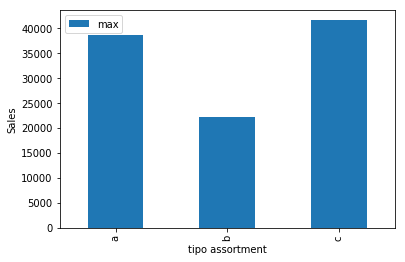

In [90]:
plt.figure()
plt.ylabel('Sales') 
plt.xlabel('tipo store')  
nuevo4['max'].plot(kind='bar',legend=True)
plt.savefig('sales_tipo_a_max.png')

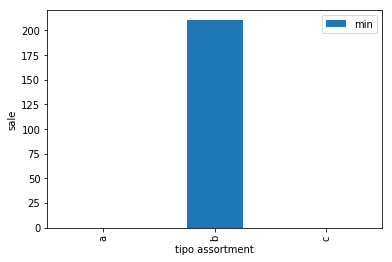

In [91]:
plt.figure()
plt.ylabel('sale')  
nuevo2['min'].plot(kind='bar',legend=True)
plt.savefig('sale_tipo_a_min.png')

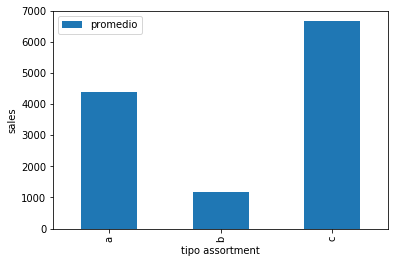

In [92]:
plt.figure()
plt.ylabel('sales')  
nuevo2['promedio'].plot(kind='bar',legend=True)
plt.savefig('sale_tipo_a_promedio.png')

<hr>
<h1> comparación Clientes vs tipo store</h1>
<hr>

In [93]:
d5 = {'tipo store': ['a', 'b','c','d'], 
     'max': [
         final[final.tipo_store_a==1].Customers.max(),
         final[final.tipo_store_b==1].Customers.max(),
         final[final.tipo_store_c==1].Customers.max(),
         final[final.tipo_store_d==1].Customers.max()
     ],
     'min': [
         final[final.tipo_store_a==1].Customers.min(),
         final[final.tipo_store_b==1].Customers.min(),
         final[final.tipo_store_c==1].Customers.min(),
         final[final.tipo_store_a==1].Customers.min()
     ],
     'promedio': [
         final[final.tipo_store_a==1].Customers.mean(),
         final[final.tipo_store_b==1].Customers.mean(),
         final[final.tipo_store_c==1].Customers.mean(),
         final[final.tipo_store_a==1].Customers.mean()
     ]
    }
nuevo5=pd.DataFrame(d5)
nuevo5.set_index('tipo store', inplace=True)

In [94]:
nuevo5

,max,min,promedio
tipo store,,,
a,7388,0,659.03
b,5494,0,1987.72
c,3096,0,673.27
d,2239,0,659.03


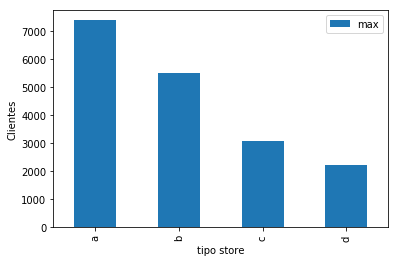

In [95]:
plt.figure()
plt.ylabel('Clientes') 
plt.xlabel('tipo store')  
nuevo5['max'].plot(kind='bar',legend=True)
plt.savefig('Clientes_tipo_s_max.png')

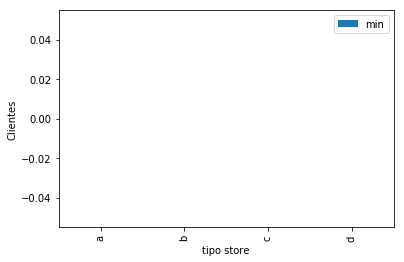

In [96]:
plt.figure()
plt.ylabel('Clientes')  
nuevo5['min'].plot(kind='bar',legend=True)
plt.savefig('Clientes_tipo_s_min.png')

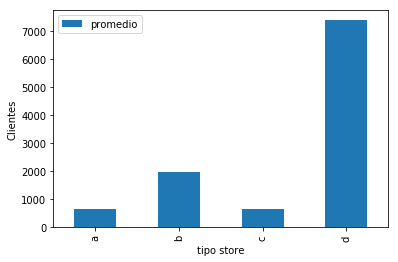

In [53]:
plt.figure()
plt.ylabel('Clientes')  
nuevo5['promedio'].plot(kind='bar',legend=True)
plt.savefig('Clientes_tipo_s_promedio.png')

<hr>
<h1> comparación cliente vs tipo assortment</h1>
<hr>

In [54]:
d6 = {'tipo assortment': ['a', 'b','c'],
     'max': [final[final.tipo_assortment_a==1].Customers.max(),final[final.tipo_assortment_b==1].Customers.max(),final[final.tipo_assortment_c==1].Customers.max()],
     'min': [final[final.tipo_assortment_a==1].Customers.min(),final[final.tipo_assortment_b==1].Customers.min(),final[final.tipo_assortment_c==1].Customers.min()],
     'promedio': [final[final.tipo_assortment_a==1].Customers.mean(),final[final.tipo_assortment_b==1].Customers.mean(),final[final.tipo_assortment_c==1].Customers.mean()]}
nuevo6=pd.DataFrame(d6)
nuevo6.set_index('tipo assortment', inplace=True)

In [55]:
nuevo6

,max,min,promedio
tipo assortment,,,
a,7388,0,619.16
b,4645,0,2046.36
c,4911,0,624.22


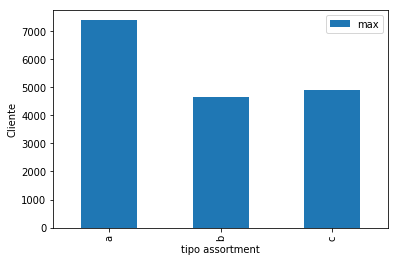

In [56]:
plt.figure()
plt.ylabel('Cliente') 
plt.xlabel('tipo store')  
nuevo6['max'].plot(kind='bar',legend=True)
plt.savefig('cliente_tipo_a_max.png')

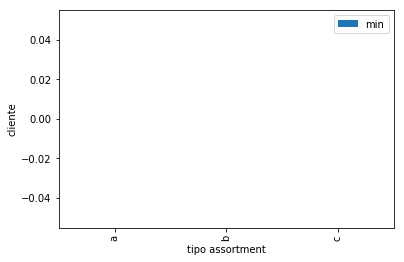

In [57]:
plt.figure()
plt.ylabel('cliente')  
nuevo6['min'].plot(kind='bar',legend=True)
plt.savefig('cliente_tipo_a_min.png')

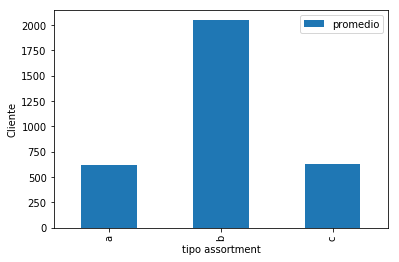

In [58]:
plt.figure()
plt.ylabel('Cliente')  
nuevo6['promedio'].plot(kind='bar',legend=True)
plt.savefig('cliente_tipo_a_promedio.png')

In [62]:
final.groupby('DayOfWeek').Store.count()

DayOfWeek
1    144730
2    145664
3    145665
4    145845
5    145845
6    144730
7    144730
Name: Store, dtype: int64

In [60]:
.erroreae

SyntaxError: invalid syntax (<ipython-input-60-52bfdb4cdbc1>, line 1)

<hr>
<h1> comparación Clientes vs dia</h1>
<hr>

In [72]:
d6 = {'Dia': ['Lu', 'Ma','Mi','Ju','Vi','Sa','Do'], 
     'max': [
             final[final.DayOfWeek==1].Customers.max(),
             final[final.DayOfWeek==2].Customers.max(),
             final[final.DayOfWeek==3].Customers.max(),
             final[final.DayOfWeek==4].Customers.max(),
             final[final.DayOfWeek==5].Customers.max(),
             final[final.DayOfWeek==6].Customers.max(),
             final[final.DayOfWeek==7].Customers.max(),
     ],
     'min': [
         final[final.tipo_store_a==1].Customers.min(),
         final[final.tipo_store_b==1].Customers.min(),
         final[final.tipo_store_c==1].Customers.min(), 
         final[final.tipo_store_a==1].Customers.max()
     ],
     #'promedio':[final[final.tipo_store_a==1].Customers.mean(),final[final.tipo_store_b==1].Customers.mean(),final[final.tipo_store_c==1].Customers.mean(),final[final.tipo_store_a==1].Customers.max()]
    }
nuevo6=pd.DataFrame(d6)
nuevo6.set_index('Dia', inplace=True)

In [71]:
nuevo6

,max
Dia,
Lu,7388
Ma,5494
Mi,3096
Ju,2239
Vi,7388
Sa,5494
Do,3096


In [ ]:
plt.figure()
plt.ylabel('Clientes') 
plt.xlabel('tipo store')  
nuevo6['max'].plot(kind='bar',legend=True)
plt.savefig('Clientes_tipo_s_max.png')

In [ ]:
plt.figure()
plt.ylabel('Clientes')  
nuevo5['min'].plot(kind='bar',legend=True)
plt.savefig('Clientes_tipo_s_min.png')

In [ ]:
plt.figure()
plt.ylabel('Clientes')  
nuevo5['promedio'].plot(kind='bar',legend=True)
plt.savefig('Clientes_tipo_s_promedio.png')

<hr>
<h1> comparación cliente vs tipo assortment</h1>
<hr>

In [ ]:
d6 = {'tipo assortment': ['a', 'b','c'],
     'max': [final[final.tipo_assortment_a==1].Customers.max(),final[final.tipo_assortment_b==1].Customers.max(),final[final.tipo_assortment_c==1].Customers.max()],
     'min': [final[final.tipo_assortment_a==1].Customers.min(),final[final.tipo_assortment_b==1].Customers.min(),final[final.tipo_assortment_c==1].Customers.min()],
     'promedio': [final[final.tipo_assortment_a==1].Customers.mean(),final[final.tipo_assortment_b==1].Customers.mean(),final[final.tipo_assortment_c==1].Customers.mean()]}
nuevo6=pd.DataFrame(d6)
nuevo6.set_index('tipo assortment', inplace=True)

In [ ]:
nuevo6

In [ ]:
plt.figure()
plt.ylabel('Cliente') 
plt.xlabel('tipo store')  
nuevo6['max'].plot(kind='bar',legend=True)
plt.savefig('cliente_tipo_a_max.png')

In [ ]:
plt.figure()
plt.ylabel('cliente')  
nuevo6['min'].plot(kind='bar',legend=True)
plt.savefig('cliente_tipo_a_min.png')

In [ ]:
plt.figure()
plt.ylabel('Cliente')  
nuevo6['promedio'].plot(kind='bar',legend=True)
plt.savefig('cliente_tipo_a_promedio.png')